# QCTO - Workplace Module

### Project Title: River Water Pollution in Buenos Aires
#### Done By: Thando Calana

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [60]:
#Please use code cells to code in and do not forget to comment your code.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
#Please use code cells to code in and do not forget to comment your code.

data = pd.read_csv("river_water_parameters.csv")

In [5]:
data.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.2,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.9,86.0,BLANDA,82.0
3,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.7,200.0,SEMIDURA,117.0
4,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.6,196.0,SEMIDURA,117.0


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [7]:
# We will start off by getting general information on the data we are working with
# This will help identify column names, columns with null values and a count of non-nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness c

In [9]:
# We create a copy of the df, which we will perform all the cleaning operations on
cleaned_df = data.copy()

In [11]:
# Before dealing with NULL values, we rename the columns for better readability
# Here, we create a lit that contains the new names that will be assigned to the columns
columns = ["Date", "Time", "Sampling_point", "Ambient_temperature",
           "Ambient_humididty", "Sample_temperature", "ph", "Conductivity",
           "TDS", "TSS", "DO", "Level", "Turbidity", "Hardness", "Hard_class", "CL"]

In [13]:
# Here, we assign the new column names
cleaned_df.columns = columns

All but one of the columns with null values are numeric. This means we have to separate the different columns as we will perform similar operations but cater to their differing data types.

In [16]:
# From the data.info() output, we have identified the following as columns with null values
numeric_columns_with_nulls = ["TSS", "Level", "Turbidity", "Hardness", "CL"]

In [18]:
# For the numeric columns, we will use mean imputation. 
# Mean so as not to affect any statistical calculations used later.
# Imputation so that we do not drop the columns and lose data.

for col in numeric_columns_with_nulls:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mean())

In [23]:
# For the categorical column, we will use mode imputation.
# Instead of mean, here, we will use the most commonly occurring categorical value

categorical_columns_with_nulls = ["Hard_class"]
for col in categorical_columns_with_nulls:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mode()[0])

In [25]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 219 non-null    object 
 1   Time                 219 non-null    object 
 2   Sampling_point       219 non-null    object 
 3   Ambient_temperature  219 non-null    float64
 4   Ambient_humididty    219 non-null    float64
 5   Sample_temperature   219 non-null    float64
 6   ph                   219 non-null    float64
 7   Conductivity         219 non-null    int64  
 8   TDS                  219 non-null    int64  
 9   TSS                  219 non-null    float64
 10  DO                   219 non-null    float64
 11  Level                219 non-null    float64
 12  Turbidity            219 non-null    float64
 13  Hardness             219 non-null    float64
 14  Hard_class           219 non-null    object 
 15  CL                   219 non-null    flo

As can be seen, there are no null values remaining in our columns.

The date, time and sampling point columns don't add much to the statistical analysis methods that will be used therefore, they will be dropped. Before dropping the sampling point column, however, we will perform some visualisation of data to see where the data are drawn from. The assumption here is that these columns do not significantly impact the quality of the water in the rivers. The categorical variable, hardness classification, will be encoded and potentially used later depending on the analysis done.

In [32]:
cleaned_df = cleaned_df.drop(columns =['Date','Time'])

In [34]:
# This step ensures that there aren't any duplicated rows in our data
cleaned_df = cleaned_df.drop_duplicates()

In [36]:
retained_data = len(cleaned_df) / len(data) * 100

print(f"After the cleaning process, we have managed to retain {retained_data} % of our data.")

After the cleaning process, we have managed to retain 100.0 % of our data.


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [39]:
#Please use code cells to code in and do not forget to comment your code.

In [41]:
cleaned_df.head()

,Sampling_point,Ambient_temperature,Ambient_humididty,Sample_temperature,ph,Conductivity,TDS,TSS,DO,Level,Turbidity,Hardness,Hard_class,CL
0,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,38.277778,144.954083,147.0,BLANDA,156.0
1,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,38.277778,41.200000,94.0,BLANDA,78.0
2,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,38.277778,38.900000,86.0,BLANDA,82.0
3,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,38.277778,30.700000,200.0,SEMIDURA,117.0
4,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,38.277778,25.600000,196.0,SEMIDURA,117.0


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [44]:
#Please use code cells to code in and do not forget to comment your code.

The sampling points and hard class classification are not essential columns. They are merely labels, and we have already extracted the relevant features of the sampling points and class classification. Because of this, we can drop them.

In [47]:
labels = ["Sampling_point", "Hard_class"]

# This piece of code will iterate through the columns in the cleaned df and 
# return the columns that are not in the list of labels mentioned above

features = [col for col in cleaned_df.columns if col not in labels]
features

['Ambient_temperature',
 'Ambient_humididty',
 'Sample_temperature',
 'ph',
 'Conductivity',
 'TDS',
 'TSS',
 'DO',
 'Level',
 'Turbidity',
 'Hardness',
 'CL']

In [49]:
cleaned_df = cleaned_df[features]
cleaned_df.head()

,Ambient_temperature,Ambient_humididty,Sample_temperature,ph,Conductivity,TDS,TSS,DO,Level,Turbidity,Hardness,CL
0,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,38.277778,144.954083,147.0,156.0
1,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,38.277778,41.200000,94.0,78.0
2,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,38.277778,38.900000,86.0,82.0
3,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,38.277778,30.700000,200.0,117.0
4,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,38.277778,25.600000,196.0,117.0


Dissolved Oxygen (DO) will be the reponse variable due to the fact that dissolved oxygen levels reflect water quality and are important for maintaining healthy ecosystems.

In [52]:
X = cleaned_df.drop(columns = "DO")
y = cleaned_df["DO"]

Before going into feature engineering, we will scale our data to ensure that extremely large or small values don't have undue influence on our models.

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = np.array(y)
y_scaled = scaler.fit_transform(y[:, np.newaxis]).ravel()

To extract the most influential features, we perform Principal Component Analysis (PCA). This will allow us to reduce the number of features considered, while still capturing a significant amount of variance within the data. 

In [62]:
pca = PCA()
pca.fit_transform(X_scaled)

# Each column shows how much variance is explained by the PC
pca.explained_variance_

array([3.38881364e+00, 2.11300604e+00, 1.68570328e+00, 1.08063795e+00,
       8.90783391e-01, 6.09040357e-01, 5.55808934e-01, 3.37558265e-01,
       2.71838586e-01, 1.16531063e-01, 7.37211173e-04])

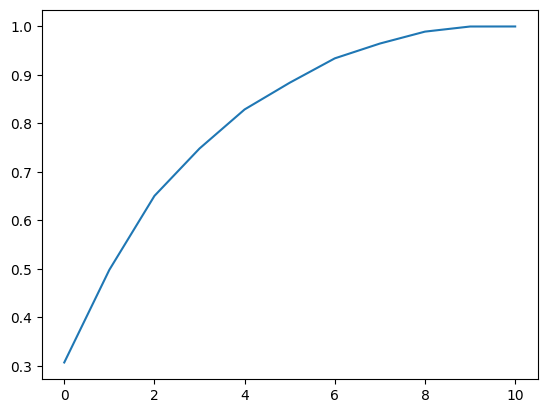

In [64]:
# Cummulative frequency of the explained variance of each PC
np.cumsum(pca.explained_variance_ratio_) 

plt.plot(np.cumsum(pca.explained_variance_ratio_)) # Plots the cum freq

We can see that with 7 components, we are able to capture at least 90% of the variance in our data, and we can now use this number (7) going forward is our train test splits, going into the model building.

Now, let's split the dataset up into train and test using an arbitrary ratio of 80/20 (train/test, respectively).

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

Next, we apply PCA to the training set with the number of components set to 7.

In [69]:
# create PCA object with n_components set to 6
pca_7 = PCA(n_components = 7)

# fit the PCA model to our data and apply the dimensionality reduction 
X_train = pca_7.fit_transform(X_train)

# confirm the number of components
pca_7.n_components_

7

In [71]:
float(pca_7.explained_variance_ratio_.sum())

0.9362974785047805

In [73]:
X_test = pca_7.transform(X_test)

### Model Training

The models that will be considered in this project will be Random Forests, Linear Regression, Support Vector models and Partial Least Squares Regression models.

In [82]:
rf = RandomForestRegressor(n_estimators = 1000, n_jobs=-1, random_state = 42)

# Traininig the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [83]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [88]:
plsr = PLSRegression(n_components=7)
plsr.fit(X_train, y_train)

PLSRegression(n_components=7)

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

Since we've trained all the base models which will be used, the next logical step is to tune their hyper parameters in order to get the combination of hyper params which yield the best performning version of the model. After extracting the optimal combination of hyper parameters, we can then compare those tuned models to see which one will be used in the end as the final model best suited to predict DO, our response variable. 

To run the tests and different iterations of the different combinations of parameters, we will use GridSearch cross-validation.

The Linear Regression model doesn't have tunable parameters so we will use its base configuration to evaluate performance metrics.

#### Random Forest

In [232]:
n_estimators = [10, 50, 100, 1000]
param_grid = {'n_estimators': n_estimators}

# Using GridSearchCV on rf model
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)

grid_rf.best_params_

{'n_estimators': 1000}

#### SVR

In [234]:
# The parameters that will be used in GridSearch to find the best-performing model
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['rbf', 'linear'] 
}
# Using GridSearchCV on svr model
grid_svr = GridSearchCV(SVR(), param_grid, scoring='r2', cv=5)
grid_svr.fit(X_train, y_train)

grid_svr.best_params_

{'C': 10, 'epsilon': 0.5, 'kernel': 'rbf'}

#### PLS Regression

In [245]:
cs = [1, 2, 3, 4, 5, 7]
param_grid = {'n_components': cs}

# Using GridSearchCV on pls model
grid_pls = GridSearchCV(PLSRegression(), param_grid, scoring='r2', cv=5)
grid_pls.fit(X_train, y_train)

grid_pls.best_params_

{'n_components': 1}

#### Training models on optimal parameters

The Random Forest model's tuned version has the same amount estimators so the only two models that need to be trained again are the SVR and the PLSRegressor.

In [252]:
svr = SVR(C = 10, epsilon = 0.5, kernel = "rbf")
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.5)

In [254]:
plsr = PLSRegression(n_components=1)
plsr.fit(X_train, y_train)

PLSRegression(n_components=1)

Now that our 'optimal' models have been trained, we can use them to predict values for DO, using X_test.

In [105]:
y_pred_rf = rf.predict(X_test) # Predicting with RF model
y_pred_lr = lr.predict(X_test) # Predicting with LR model
y_pred_svr = svr.predict(X_test) # Predicting with SVR model
y_pred_plsr = plsr.predict(X_test) # Predicting with PLSR model

The next step is to calculate our model metrics, which we will use to compare how well our models perform. Since we've used regression models, the main metrics to consider are the RMSE, R2 Score and MAE. The RMSE is a measure of how close the predicted values of DO are to the actual DO values in the data. It is very similar to the MAE, where RMSE penalizes large values (since it squaress values) whereas the MAE provides the mean absolute difference between the actual and predicted DO values. 

In [109]:
rmse_rf = round(float(np.sqrt(mean_squared_error(y_test, y_pred_rf))), 4)
mae_rf = round(mean_absolute_error(y_test, y_pred_rf), 4)
r2_rf = round(r2_score(y_test, y_pred_rf), 4)

rf_report = {
    'RMSE': rmse_rf,
    'MAE': mae_rf,
    'R2': r2_rf
}

rf_report

{'RMSE': 0.4828, 'MAE': 0.354, 'R2': 0.7258}

In [111]:
rmse_lr = round(float(np.sqrt(mean_squared_error(y_test, y_pred_lr))), 4)
mae_lr = round(mean_absolute_error(y_test, y_pred_lr), 4)
r2_lr = round(r2_score(y_test, y_pred_lr), 4)

regression_report = {
    'RMSE': rmse_lr,
    'MAE': mae_lr,
    'R2': r2_lr
}

regression_report

{'RMSE': 0.5813, 'MAE': 0.4529, 'R2': 0.6024}

In [113]:
rmse_svr = round(float(np.sqrt(mean_squared_error(y_test, y_pred_svr))), 4)
mae_svr = round(mean_absolute_error(y_test, y_pred_svr), 4)
r2_svr = round(r2_score(y_test, y_pred_svr), 4)

svr_report = {
    'RMSE': rmse_svr,
    'MAE': mae_svr,
    'R2': r2_svr
}

svr_report

{'RMSE': 0.5274, 'MAE': 0.3859, 'R2': 0.6728}

In [115]:
rmse_plsr = round(float(np.sqrt(mean_squared_error(y_test, y_pred_plsr))), 4)
mae_plsr = round(mean_absolute_error(y_test, y_pred_plsr), 4)
r2_plsr = round(r2_score(y_test, y_pred_plsr), 4)

plsr_report = {
    'RMSE': rmse_plsr,
    'MAE': mae_plsr,
    'R2': r2_plsr
}

plsr_report

{'RMSE': 0.5813, 'MAE': 0.4529, 'R2': 0.6024}

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [119]:
# Combine into DataFrame
report_df = pd.DataFrame({
    'Random Forest': rf_report,
    'Linear Regression': regression_report,
    'SVR': svr_report,
    'PLS': plsr_report
}).T 

report_df

,RMSE,MAE,R2
Random Forest,0.4828,0.3540,0.7258
Linear Regression,0.5813,0.4529,0.6024
SVR,0.5274,0.3859,0.6728
PLS,0.5813,0.4529,0.6024


The best-performing model in the comparison is Random Forest, which achieved the lowest RMSE (0.4828) and MAE (0.3540), along with the highest R² score of 0.7258. These metrics indicate that Random Forest not only made the most accurate predictions overall but also had the fewest large errors and captured the most variance in the data. This model used a configuration involving a substantial number of estimators of 1000. The Random Forest was chosen over other models because of its ability to handle non-linear relationships, its robustness to overfitting due to ensemble averaging, and its consistent performance across multiple error metrics, making it the most reliable and effective option among the compared algorithms.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.
<ul>
    <li>
       <a href=https://github.com/ThandoCalana/QCTO-Workplace>GitHub</a> 
    </li>
    <li>
        <a href=https://trello.com/b/H3W6cShr/qcto-workplace>Trello Board</a>
    </li>
    <li>
        <a href=https://www.canva.com/design/DAGicydbHBg/lyCpbZMosfMPa9YJtTpl3w/edit> Presentation Slides </a>
    </li>
</ul>

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
